Jupiter Notebook: Visualize Vulnerability

Prepared by: Fatemeh Jalayer, Hossein Ebrahimian

Uses data from: Empirical Tsunami Risk Products Dataset (ETRiS v0, https://eurotsunamirisk.org/)

This Notebook describes how the vulnerability data in EPOS-ICS-C portal in the layer entitled "Empirical Tsunami Risk Products Dataset (ETRiS v0)" can be visualized and interpretted.

This dataset provides risk products derived based on observed data from past tsunami events. These risk products consist of tsunami fragility and vulnerability curves, which are essential data products for risk assessment. The observed data, which are not directly visualized in this layer, were consisted of information about tsunami effects (e.g., tsunami height, flow depth) and tsunami consequences (e.g., casualties, building damage).

For each location, depedending on the type of data available, either fragillity or vulnerability curves can be visualized. This Jupyter Notebook decsribes how the vulnerability information can be visualized. 

The vulnerability curves report the probabilty of exceeding a number of fatalities or a certain loss level as a function of a tsunami intensity measure (e.g., flow depth, runup). The example of vulnerability curve described here shows how a vulnerability curve can be visualized based the historic data from the 1775 Lisbon Earthquake and Tsunami.

In order to plot the vulnerability curves two main pieces are needed:

1-The exposed asset: The vulnerability curvse can be derived for a single exposed asset like a building, for a class of assets, or for a spatial extent. The example shown below refers to an entire city.

2-Vulnerability model: The same as the fragility curve, also the vulnerability curve is a probability cumulative distribution. Therefore a vulnerability model defines the specific probability distribution.

The procedure of visualizing a vulnerability curve is dsecribed as follows:

(1) Reading the input from CSV file on GitHub:

https://github.com/eurotsunamirisk/etris_data_and_data_products/tree/main/etris_data_products/Vulnerability_Curves

For example, the vulnerability curve derived based on Lisbon 1755 Tsunami historical data (Santos and Koshimura 2015, DOI: doi: 10.17265/2332-8223/2015.04.004) for Model 3 (the possibilities were Model 1, Model 2, Model 3): 
https://github.com/eurotsunamirisk/etris_data_and_data_products/blob/main/etris_data_products/Vulnerability_Curves/Lisbon%20Tsunami%201775_M3.csv

This step can be repeated for all the vulnerability models by changing the model number. In this example, each vulnerability model refers to a different link function. Model 1 refers to a logistic link function of the type: (1+exp(ax+b))^-1; Model 2 refers to probit link function of the type F(ax+b), where F is the standard Guassian CDF. Model 3 refers to a cloglog link function of the type 1-exp(-exp(ax+b)).For more information regarding the fragility models, please see the following article:

Jalayer, F., Ebrahimian, H., Trevlopoulos, K., Bradley, B. (2023). Empirical tsunami fragility modelling for hierarchical damage levels. Natural Hazards and Earth System Sciences, 23(2), 909-931. https://nhess.copernicus.org/articles/23/909/2023/

Note: Before running the Python code, the following libraries should be installed:
pandas, plotly, numpy, scipy, math

In [2]:
# Initial Libraries

import pandas as pd
import plotly.graph_objects as ply
import numpy as np
import scipy.stats as ss
import math

In [3]:
# Read CSV file

allData = pd.read_csv('Lisbon Tsunami 1775_M3.csv',skiprows=[0])
intensityType = allData.columns[0];

IM = allData[intensityType]
RF_minus1sigma = allData['mean-1sigma loss curve']
RF = allData['mean loss curve']
RF_plus1sigma = allData['mean+1sigma loss curve']

# Show the CSV file
allData

,Run-up [m],mean-1sigma loss curve,mean loss curve,mean+1sigma loss curve,median,logarithmic standard deviation,epistemic uncertainty
0,0.000001,0.000000,5.170350e-17,5.194410e-16,20.753356,0.492434,0.043707
1,0.010000,0.000000,1.347900e-08,3.662410e-08,NaN,NaN,NaN
2,0.020000,0.000000,6.302980e-08,1.544760e-07,NaN,NaN,NaN
3,0.030000,0.000000,1.563950e-07,3.612190e-07,NaN,NaN,NaN
4,0.040000,0.000000,2.988910e-07,6.622060e-07,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3996,39.960000,0.931972,9.595082e-01,9.870444e-01,NaN,NaN,NaN
3997,39.970000,0.932070,9.595792e-01,9.870889e-01,NaN,NaN,NaN
3998,39.980000,0.932167,9.596502e-01,9.871332e-01,NaN,NaN,NaN
3999,39.990000,0.932264,9.597210e-01,9.871775e-01,NaN,NaN,NaN


(2) Plotting the vulnerability curve and its confidence intervals. Here, the vulnerability curve depicts the probability of loss of life versus tsunami run-up in meters. The confidence interval reflects the number of empirical data points that has been used for constructing the curve.

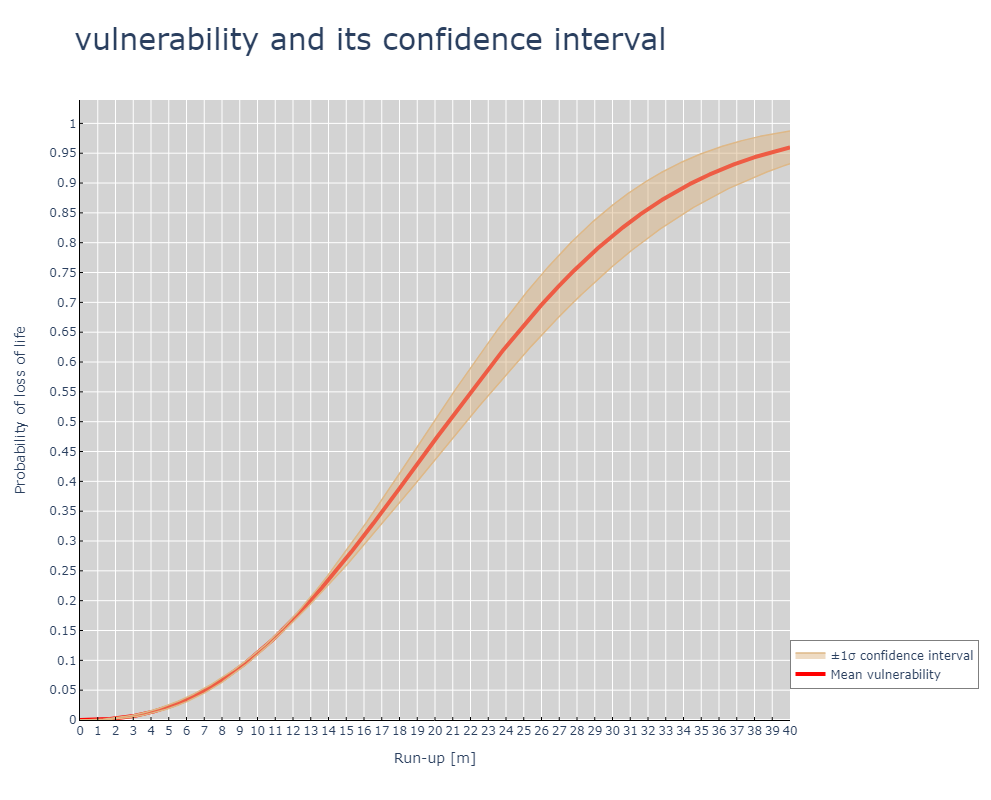

In [11]:
# Plot the vulnerability curve

fig = ply.Figure()

fig.add_scatter(x=IM,y=RF,mode='lines',line=dict(color='red',width=4),name='Mean vulnerability')
fig.add_scatter(x=IM,y=RF_minus1sigma,mode='lines',line=dict(color='burlywood',width=1.5),showlegend=False)
fig.add_scatter(x=IM,y=RF_plus1sigma,mode='lines',line=dict(color='burlywood',width=1.5),fill='tonexty',name=('±1\u03C3 confidence interval'))

fig.update_xaxes(showline=True,linecolor='black',title=intensityType, tickmode = 'linear',tick0 = 0.0,dtick = 1,ticklen=3, tickcolor='black',ticks="inside",showgrid=True)
fig.update_yaxes(showline=True,linecolor='black',title='Probability of loss of life', tickmode = 'linear',tick0 = 0.0,dtick = 0.05,ticklen=3, tickcolor='black',ticks="inside",showgrid=True)

fig.update_layout(width=1000,height=800,plot_bgcolor='lightgray',legend=dict(bordercolor='black',borderwidth=0.5,x=1,y=0.05),title =dict(text='vulnerability and its confidence interval',x=0.075,font=dict(size=30)),)

fig.update_yaxes(rangemode="tozero")

fig.update_xaxes(showspikes=True)
fig.update_yaxes(showspikes=True)

fig.show()

(3) Estimate the vulnerability curve parameters: In this step, the median and the logarithmic standard deviation of the vulnerability curve are estimated. The median is the intensity measure with 50% probability of the loss of life. The logarithmic standard deviation shows (half of) the distance in the log scale between intensity measures with 84% probability of loss of life and with 16 percent probability of loss of life.

In [5]:
# Estimating the parameters of the fragility curve

etaIMc = np.interp(0.50,RF,IM)
IMc16 = np.interp(ss.norm.cdf(-1.0),RF,IM)
IMc84 = np.interp(ss.norm.cdf(1.0),RF,IM)
betaIMc = 0.5*math.log(IMc84/IMc16)

IM16 = np.interp(0.5,RF_plus1sigma,IM)
IM84 = np.interp(0.5,RF_minus1sigma,IM)
betaUF = 0.5*math.log(IM84/IM16)

(4) Having calculated the parameters of the vulnerability curve, they can be shown graphically on the curve. Here, we show the median (the 50th percentile IM), the 16th and 84th percentile IM's (eg, tsunami run up). Recall that the logarithmic standard deviation is calculated as half of (natural log of) the ratio between the 84th and 16th percentile IM's.

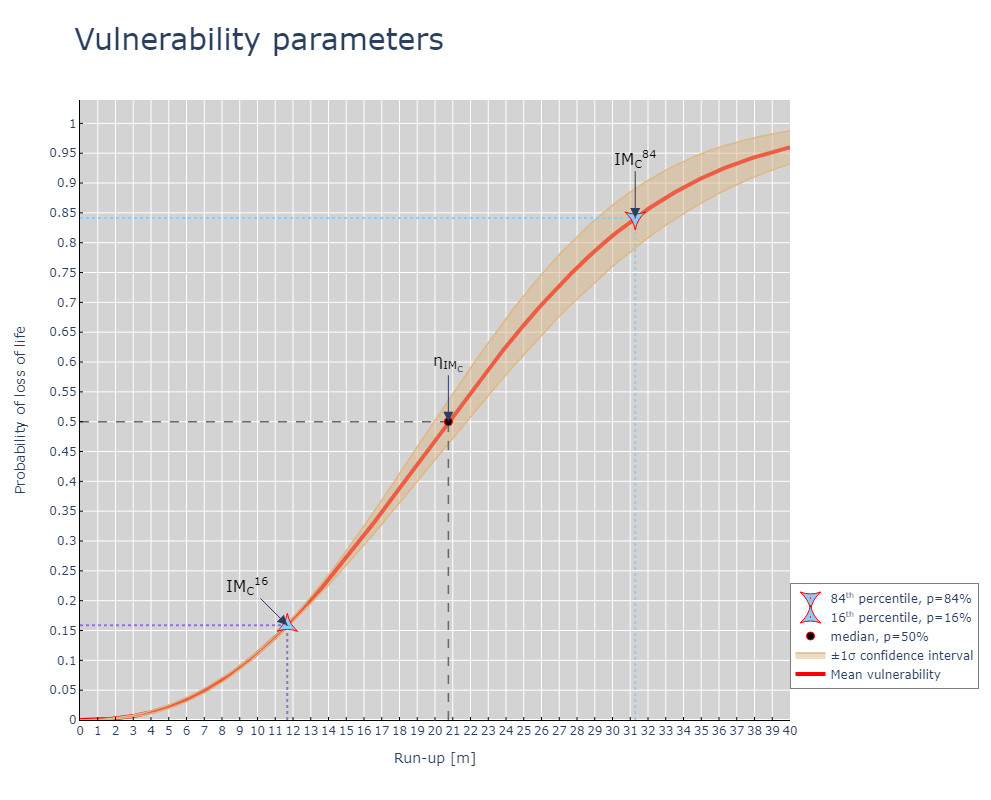

In [6]:
# Show the parameters of the fragility curve

fig.add_scatter(x=[0,etaIMc],y=[0.5,0.5],mode='lines',line=dict(color='dimgrey',width=1.5,dash='dash'),showlegend=False)
fig.add_scatter(x=[etaIMc,etaIMc],y=[0,0.5],mode='lines',line=dict(color='dimgrey',width=1.5,dash='dash'),showlegend=False)
fig.add_scatter(x=[etaIMc],y=[0.5],mode='markers',
                marker=dict(size=8,color='black',
                            line=dict(color='red',width=1)),name='median, p=50%')

fig.add_scatter(x=[0,IMc16],y=[ss.norm.cdf(-1.0),ss.norm.cdf(-1.0)],mode='lines',line=dict(color='MediumPurple',width=2,dash='dot'),showlegend=False)
fig.add_scatter(x=[IMc16,IMc16],y=[0,ss.norm.cdf(-1.0)],mode='lines',line=dict(color='MediumPurple',width=2,dash='dot'),showlegend=False)
fig.add_scatter(x=[IMc16],y=[ss.norm.cdf(-1.0)],mode='markers',
                marker=dict(size=15,color='LightSkyBlue',symbol="star-triangle-up-dot",
                            line=dict(color='red',width=1)),name='16<sup>th</sup> percentile, p=16%')

fig.add_scatter(x=[0,IMc84],y=[ss.norm.cdf(1.0),ss.norm.cdf(1.0)],mode='lines',line=dict(color='LightSkyBlue',width=2,dash='dot'),showlegend=False)
fig.add_scatter(x=[IMc84,IMc84],y=[0,ss.norm.cdf(1.0)],mode='lines',line=dict(color='LightSkyBlue',width=2,dash='dot'),showlegend=False)
fig.add_scatter(x=[IMc84],y=[ss.norm.cdf(1.0)],mode='markers',
                marker=dict(size=15,color='LightSkyBlue',symbol="star-triangle-down-dot",
                            line=dict(color='red',width=1)),name='84<sup>th</sup> percentile, p=84%')

fig.add_annotation(text='\u03B7<sub>IM<sub>C</sub></sub>', font=dict(color='black',size=16),ax=0,ay=-60,
                       x=etaIMc,y=0.50,
                       arrowhead=2,arrowsize=2,arrowwidth=1,arrowside='end',
                       align='left')

fig.add_annotation(text='IM<sub>C</sup><sup>84</sup>', font=dict(color='black',size=16),ax=0,ay=-60,
                       x=IMc84,y=ss.norm.cdf(1.0),
                       arrowhead=2,arrowsize=2,arrowwidth=1,arrowside='end',
                       align='left')

fig.add_annotation(text='IM<sub>C</sup><sup>16</sup>', font=dict(color='black',size=16),ax=-40,ay=-40,
                       x=IMc16,y=ss.norm.cdf(-1.0),
                       arrowhead=2,arrowsize=2,arrowwidth=1,arrowside='end',
                       align='left')

fig.update_layout(title =dict(text='Vulnerability parameters',x=0.075,font=dict(size=30)),)

fig.update_xaxes(showspikes=True)
fig.update_yaxes(showspikes=True)

fig.show()

(5) Estimate the epistemic uncertainty: In this step, the epistemic uncertainty paramater can be estimated for the vulnerability curve. This information can be interpreted as the uncertainty in the vulnerability median expressed as logarithmic standard deviation. This is roughly equal to half of (natural log of) the ratio of the median of the plus-one-sigma vulnerability curve to the median of the minus-one-sigma vulnerability curve. 

In [7]:
# Estimating the parameters used for calculating the epistemic uncertainties

IM16 = np.interp(0.5,RF_plus1sigma,IM)
IM84 = np.interp(0.5,RF_minus1sigma,IM)
betaUF = 0.5*math.log(IM84/IM16)

(6) This value is visulaized below as the width of the confidence band (already plotted) at median:

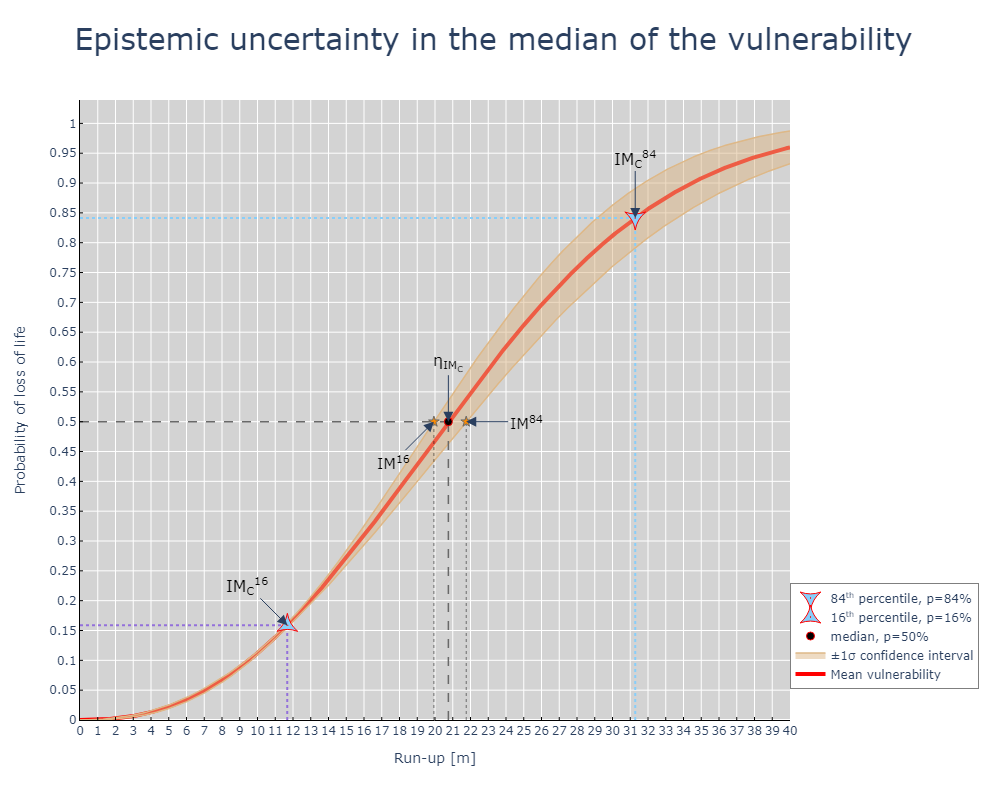

In [8]:
# Show the epistemic uncertainties

fig.add_scatter(x=[IM16,IM16],y=[0,0.5],mode='lines',line=dict(color='black',width=0.5,dash='dot'),showlegend=False)
fig.add_scatter(x=[IM16],y=[0.5],mode='markers',
                marker=dict(size=8,color='darkorange',symbol="star",
                            line=dict(color='dimgrey',width=1)),name='IM<sup>16</sup>',showlegend=False)

fig.add_scatter(x=[IM84,IM84],y=[0,0.5],mode='lines',line=dict(color='black',width=0.5,dash='dot'),showlegend=False)
fig.add_scatter(x=[IM84],y=[0.5],mode='markers',
                marker=dict(size=8,color='darkorange',symbol="star",
                            line=dict(color='dimgrey',width=1)),name='IM<sup>84</sup>',showlegend=False)


fig.add_annotation(text='IM<sup>84</sup>', font=dict(color='black',size=15),ax=60,ay=0,
                       x=IM84,y=0.50,
                       arrowhead=2,arrowsize=2,arrowwidth=1,arrowside='end',
                       align='right')

fig.add_annotation(text='IM<sup>16</sup>', font=dict(color='black',size=15),ax=-40,ay=40,
                       x=IM16,y=0.50,
                       arrowhead=2,arrowsize=2,arrowwidth=1,arrowside='end',
                       align='right')

fig.update_layout(title =dict(text='Epistemic uncertainty in the median of the vulnerability',x=0.075,font=dict(size=30)),)

fig.update_xaxes(showspikes=True)
fig.update_yaxes(showspikes=True)

fig.show()

Below, we can see a print of the vulnerability curve median (in meters), the logarithmic standard deviation (without units) and an estimate of the epistemic uncertainty in the vulnerability curve (without units).

In [12]:
print('median =', etaIMc)
print('logarithmic standard deviation =', betaIMc)
print('epistemic uncertainty =', betaUF)

median = 20.753356080698513
logarithmic standard deviation = 0.492434474431538
epistemic uncertainty = 0.043707149207714444
